<a href="https://colab.research.google.com/github/Rohan-1103/Data-Science/blob/main/task_40.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import norm
from sklearn.neighbors import KernelDensity

Insurance Dataset : https://docs.google.com/spreadsheets/d/1dAc3E4U-gBzihJ6HLM2kYVDAqQthdReg20zwwaplTW8/edit?usp=share_link

In [2]:
df = pd.read_csv("/content/insurance_data.csv")
df

,index,PatientID,age,gender,bmi,bloodpressure,diabetic,children,smoker,region,claim
0,0,1,39.0,male,23.2,91,Yes,0,No,southeast,1121.87
1,1,2,24.0,male,30.1,87,No,0,No,southeast,1131.51
2,2,3,NaN,male,33.3,82,Yes,0,No,southeast,1135.94
3,3,4,NaN,male,33.7,80,No,0,No,northwest,1136.40
4,4,5,NaN,male,34.1,100,No,0,No,northwest,1137.01
...,...,...,...,...,...,...,...,...,...,...,...
1335,1335,1336,44.0,female,35.5,88,Yes,0,Yes,northwest,55135.40
1336,1336,1337,59.0,female,38.1,120,No,1,Yes,northeast,58571.07
1337,1337,1338,30.0,male,34.5,91,Yes,3,Yes,northwest,60021.40
1338,1338,1339,37.0,male,30.4,106,No,0,Yes,southeast,62592.87


### Q-1: What is the probability distribution of age in the insurance dataset?

-- Find out using the KDE method
- Probability distribution of age is Binomial.

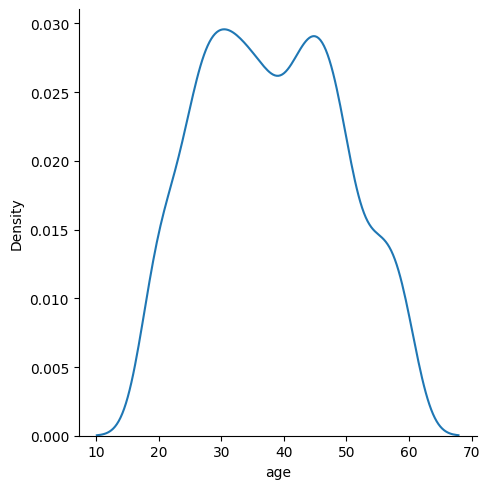

In [3]:
sns.displot(data = df, kind = 'kde', x = 'age')

In [4]:
df['age'].shape

(1340,)

In [5]:
df['age'].to_numpy().reshape(-1, 1).shape

(1340, 1)

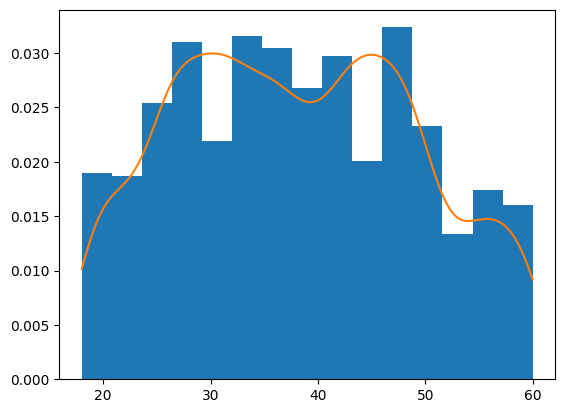

In [29]:
# plt.hist(df['age'], bins=10)
plt.hist(df['age'], bins=15, density=True)

kde = KernelDensity(kernel='gaussian', bandwidth=2).fit(df['age'].dropna().to_numpy().reshape(-1, 1))

age_range = np.linspace(df['age'].quantile(0.01), df['age'].quantile(0.99), 1000)
pdf = np.exp(kde.score_samples(age_range.reshape(-1, 1)))

plt.plot(age_range, pdf)
plt.show()

### Q-2: What is the probability of a patient having a BMI greater than 30?

We can calculate the probability of a patient having a BMI greater than 30 by counting the number of patients with a BMI greater than 30 and dividing by the total number of patients in the dataset.

In [31]:
bmi_greater_30 = df[df['bmi'] > 30]
probability_bmi_30 = len(bmi_greater_30)/len(df)
print(probability_bmi_30)

0.5216417910447761


### Q-3: Plot distribution plot of claim for Smoker and non smoker. What changes you see in the plot?

- Smokers usually have more deviation in claim amount, Major densities are on 20,000 mark and 40,000 mark. Maximum of range is around 75,000.
- Whereas, non smokers have claim amount more saturated towards the lower side. Most have claim amount near around 5,000 and max of range is around 41,000.

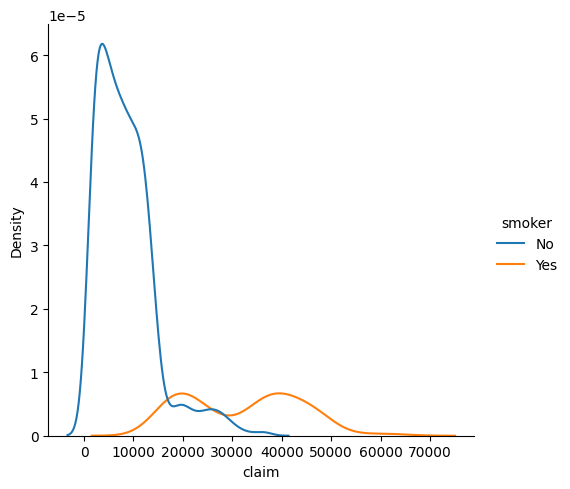

In [7]:
sns.displot(data = df, kind = 'kde', x = 'claim', hue='smoker')

### Q-4: Plot the 2D probability density plot of claim and age in the insurance dataset?

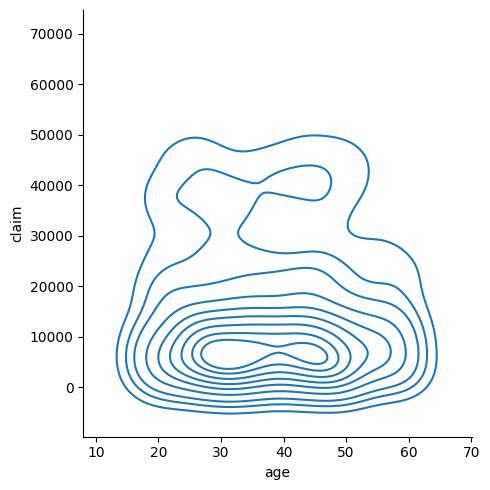

In [8]:
sns.displot(data = df, kind = 'kde', x = 'age', y = 'claim')

### Q-5: How does the disribution of claim changes for different region? Plot density plot and note down the observations

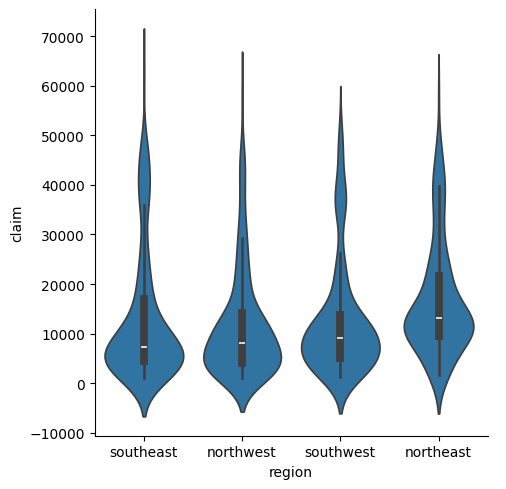

In [9]:
sns.catplot(data = df, kind='violin', x = 'region', y = 'claim')

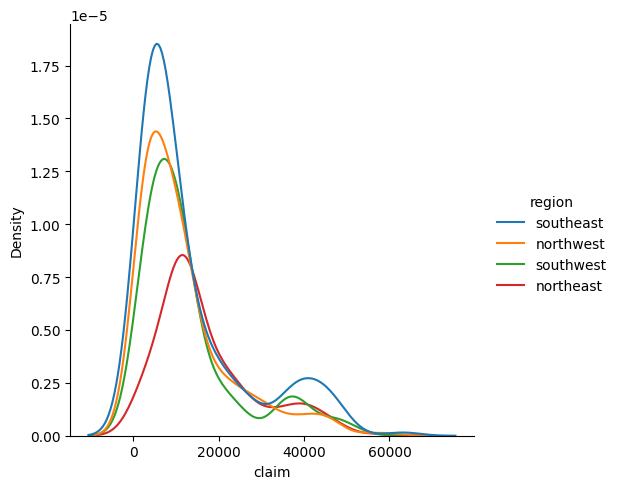

In [10]:
sns.displot(data = df, kind='kde', x = 'claim', hue = 'region')

### Q6: Plot PDF and CDF of claim in insurance data

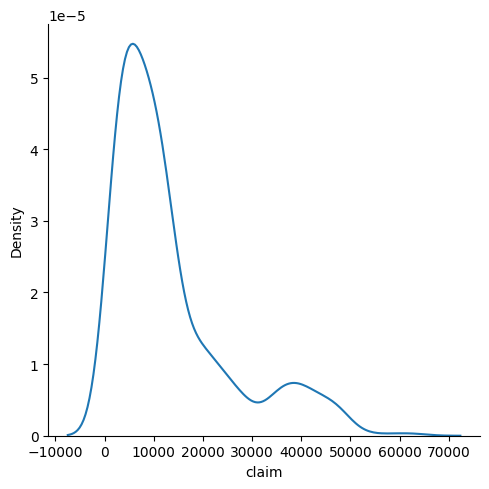

In [11]:
sns.displot(data = df, kind = 'kde', x = 'claim')

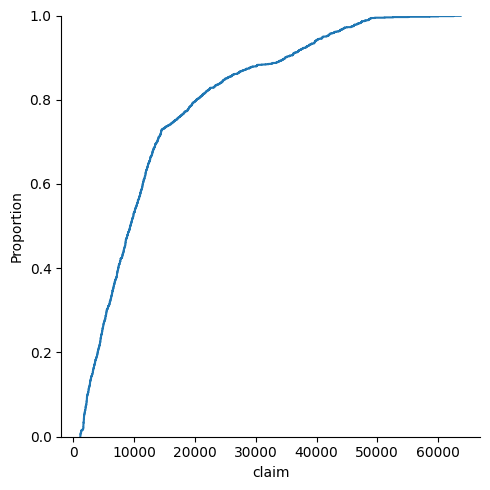

In [12]:
sns.displot(data = df, kind = 'ecdf', x = 'claim')

### Q-7: Given a probability density function f(x) = 2x for 0 <= x <= 1 and f(x) = 0 otherwise, compute the cumulative distribution function F(x) and plot it. Use this to find the probability that X is greater than 0.5.

In [13]:
# code here

### Q-8: In a manufacturing process, the thickness of a certain material is known to be normally distributed with a mean of 1.2 mm and a standard deviation of 0.05 mm. What is the probability density function of the thickness? Plot the PDF and use it to compute the probability that the thickness is between 1.1 mm and 1.3 mm.

In [14]:
from numpy.random import normal

In [15]:
sample = normal(loc = 1.2, scale=0.05, size = 1000)

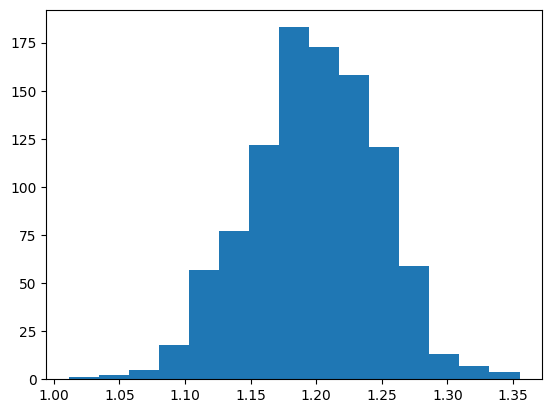

In [16]:
plt.hist(sample, bins = 15)
plt.show()

In [17]:
from scipy.stats import norm
dis = norm(1.1, 1.3)
dis

In [18]:
values = np.linspace(1.1, 1.3, 100)

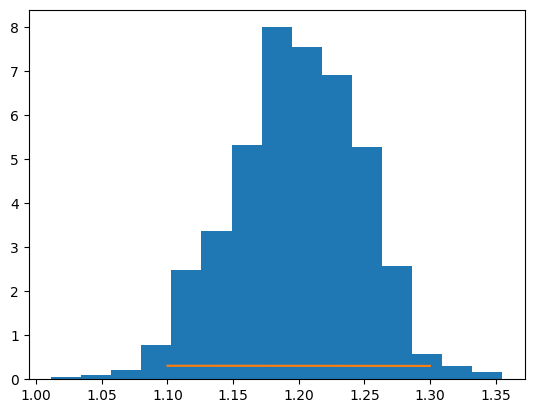

In [19]:
probabilities = [dis.pdf(value) for value in values]
plt.hist(sample, bins = 15, density=True)
plt.plot(values, probabilities)

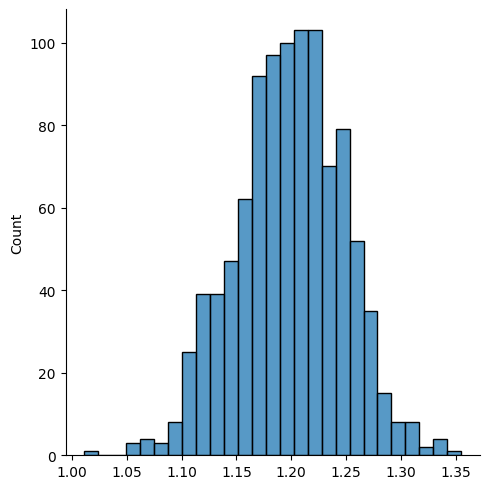

In [20]:
sns.displot(sample)

### Q-9 : A data scientist is investigating the distribution of customer ages in a retail store. She collects a sample of 100 ages and estimates the probability density function using kernel density estimation. What bandwidth should she choose to obtain the best estimate?

One common rule-of-thumb method for choosing the bandwidth in KDE is Scott's rule, which is given by:

`h = 1.06 * sigma * n^(-1/5)`

where h is the bandwidth, sigma is the standard deviation of the data, and n is the number of data points in the sample. Scott's rule is often used as a default bandwidth choice in many KDE implementations.

In [21]:
# Cross validation approach

from sklearn.model_selection import GridSearchCV
from sklearn.neighbors import KernelDensity

# Generate a sample of 100 ages
ages = np.random.normal(loc = 40, scale = 10, size = 100)

# Define the range of bandwidths to test
bandwidths = 10 ** np.linspace(-1, 1, 100)

# Define the parameters for the kernel density estimator
params = {'bandwidth': bandwidths, 'kernel': ['gaussian']}

# Create GridSearchCV object to find the best bandwidth
grid = GridSearchCV(KernelDensity(), params, cv = 5)
grid.fit(ages.reshape(-1, 1))

# Extract the best bandwidth from GridSearchCV object
best_bandwidth = grid.best_estimator_.bandwidth
print("Best bandwidth: ", best_bandwidth)

Best bandwidth:  6.892612104349698


In [22]:
# Scott Rule bandwidth
h = 1.0 * 10 * (100 ** (-1/5))
print("Scott Rule Bandwidth: ", h)

Scott Rule Bandwidth:  3.981071705534972
